<font color="red" size="4"> EDA-Risk analytics in banking and financial services </font>

<font color="red" size="3">Problem Statement:</font> Learn and understand how data is used to minimise the risk of losing money while lending to customers.

In [2]:
# import all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Set display options to show more rows/columns

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows

In [6]:
#Create a dataframe and load the csv into the dataframe

df_loan = pd.read_csv('C:/Users/Gaura/Downloads/loan.csv',low_memory=False)

df_loan.shape  #shape of the dataframe

(39717, 101)

In [8]:
# Review the structure and content of the dataset by displaying the first few rows with the head() function.

df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,27.65,0,Jan-85,1,3,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,1.00,0,Apr-99,5,3,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,8.72,0,Nov-01,2,2,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,20.00,0,Feb-96,1,10,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,17.94,0,Jan-96,0,15,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
# Obtain summary statistics using the describe() function.

df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,NaN

In [12]:
#Examine the dataset structure using the info() function

df_loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 101 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [14]:
# Check for missing values in the dataframe.

df_loan.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
purpose                               0
title                                11
dti                                   0
delinq_2yrs                           0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0


In [16]:
#Calculate missing value percentages
missing_percentage = df_loan.isnull().mean() * 100

#Identify columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index

#Drop the identified columns with >30% missing values from the dataframe
df_loan = df_loan.drop(columns=columns_to_drop)

#Print the number of columns that were dropped
print(f"Dropped columns: {len(columns_to_drop)}")

Dropped columns: 54


In [22]:
# drop unwanted columns

columns_to_drop = ['pymnt_plan', 'pub_rec', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 
                   'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt', 'tax_liens','url','zip_code','addr_state','initial_list_status']

df_loan.drop(labels=columns_to_drop,axis=1,inplace=True,errors='ignore')

In [24]:
#Fill the null values in numerical columns with the median

numerical_columns = df_loan.select_dtypes(include=['float64', 'int64']).columns
df_loan[numerical_columns] = df_loan[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)

#Fill the null values in categorical columns with the mode
categorical_columns = df_loan.select_dtypes(include=['object']).columns
df_loan[categorical_columns] = df_loan[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

In [26]:
# Converting last_credit_pull_d from Object to Datetime format
df_loan['last_credit_pull_d']= pd.to_datetime(df_loan['last_credit_pull_d'],format='%b-%d',errors='coerce')

# Converting issue_d from Object to Datetime format
df_loan['issue_d']= pd.to_datetime(df_loan['issue_d'],format='%b-%d',errors='coerce')

# Converting last_pymnt_d from Object to Datetime format
df_loan['last_pymnt_d']= pd.to_datetime(df_loan['last_pymnt_d'],format='%b-%d',errors='coerce')

# Converting earliest_cr_line from Object to Datetime format
df_loan['earliest_cr_line']= pd.to_datetime(df_loan['earliest_cr_line'],format='%b-%y',errors='coerce')

In [28]:
#Convert 'term' column to integer
df_loan['term'] = df_loan['term'].str.replace(' months', '').astype(int)

#Convert 'int_rate' column to float
df_loan['int_rate'] = df_loan['int_rate'].str.replace('%', '').astype(float)

In [30]:
#Check if all the null (missing) values have been handled effectively

df_loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries    

<font color="red" size="5"># Univariate Analysis</font>

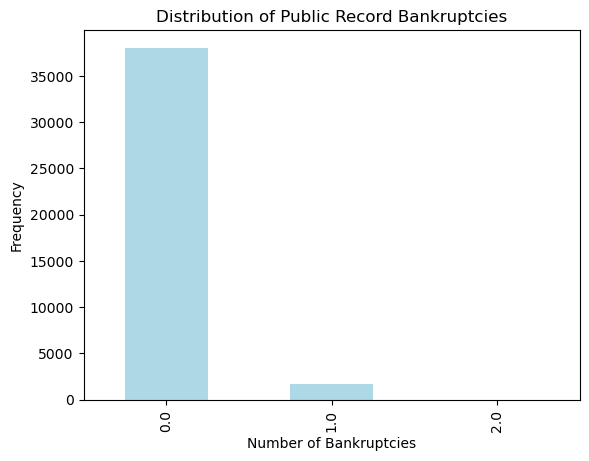

Bankruptcy counts for Charged Off Loans:
pub_rec_bankruptcies
0.0    5259
1.0     366
2.0       2
Name: count, dtype: int64


In [35]:
#Check the distribution of bankruptcies
bankruptcy_counts = df_loan['pub_rec_bankruptcies'].value_counts()

#Plot the distribution of bankruptcies
bankruptcy_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Public Record Bankruptcies')
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Frequency')
plt.show()

# 3. Check the relationship between bankruptcies and loan default
default_bankruptcy = df_loan[df_loan['loan_status'] == 'Charged Off']['pub_rec_bankruptcies'].value_counts()
print(f"Bankruptcy counts for Charged Off Loans:\n{default_bankruptcy}")

The distribution suggests that the vast majority of charged-off loans have no bankruptcy records, 
while a smaller portion have one or two bankruptcies associated with them. 
This could indicate that the loans with no bankruptcy record are more typical, and bankruptcies are relatively rare among charged-off loans.

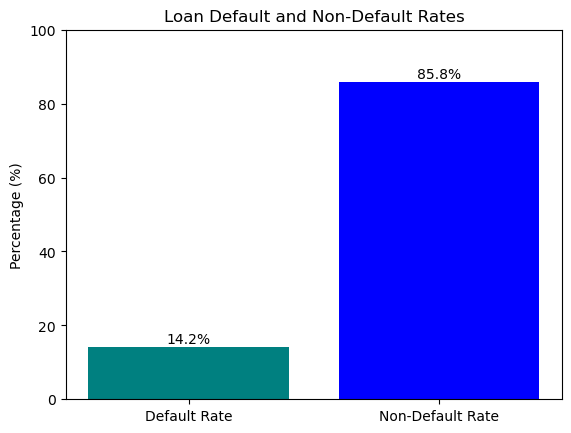

In [37]:
# Calculate total loans and rates
total_loans = len(df_loan)
default_loans = df_loan[df_loan['loan_status'] == 'Charged Off'].shape[0]
non_default_loans = total_loans - default_loans  # Non-default loans are the rest

default_rate = (default_loans / total_loans) * 100
non_default_rate = (non_default_loans / total_loans) * 100

# Data for the bar chart
categories = ['Default Rate', 'Non-Default Rate']
rates = [default_rate, non_default_rate]

# Plot the data
fig, ax = plt.subplots()
bars = ax.bar(categories, rates, color=['teal', 'blue'])

# Annotate percentages above the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
            height + 1,  # Y-coordinate (slightly above the bar)
            f'{height:.1f}%',  # Format the text as a percentage
            ha='center',  # Horizontal alignment
            fontsize=10)  # Font size

# Add titles and labels
plt.title('Loan Default and Non-Default Rates')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentage
plt.show()

A 14% default rate and 85% non-default rate typically suggest that the loan portfolio is largely performing well, 
but there is still a moderate level of risk with 14% of loans in default. 
This could warrant further investigation into risk management and lending policies to reduce defaults while maintaining a healthy portfolio.

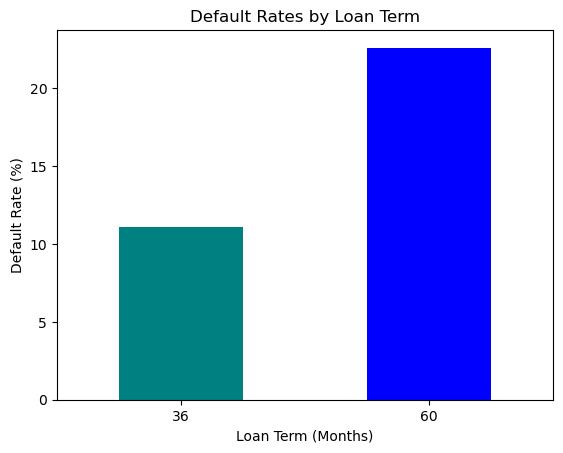

In [73]:
# Calculate default rates for each loan term (36 and 60 months) 

total_loans = df_loan.term.value_counts() # Total loans per term
default_loans = df_loan[df_loan['loan_status'] == 'Charged Off'].term.value_counts() # Defaults (Charged Off) per term
default_rate = (default_loans / total_loans) * 100 # Calculate default rates

#Plot Default Rates by Loan Term
default_rate.plot(kind='bar', color=['teal', 'Blue'])
plt.title('Default Rates by Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=0)
plt.show()



Borrowers with longer loan terms (e.g., 60 months) are more likely to default on their loans compared to borrowers with shorter loan terms. 

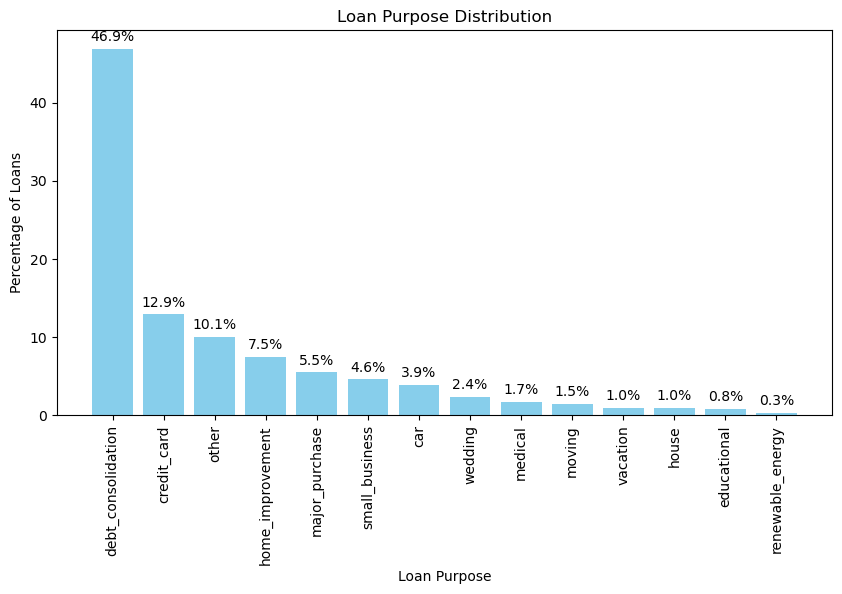

In [87]:
# Calculate the loan purpose distribution
purpose_distribution = df_loan['purpose'].value_counts(normalize=True) * 100  # Convert to percentages

# Plot the distribution
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(purpose_distribution.index, purpose_distribution.values, color='skyblue')

# Annotate bars with percentages
for i, p in enumerate(bars):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 1,
            f'{height:.1f}%',  # Format percentage
            ha='center',  # Horizontal alignment
            fontsize=10)  # Font size

# Add labels and title
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Loans')
plt.xticks(rotation=90)
plt.show()

As debt consolidation has the highest percentage so monitoring the default rates for debt consolidation loans could help identify if these loans are riskier compared to others, as borrowers may be consolidating because they are struggling with previous debt.

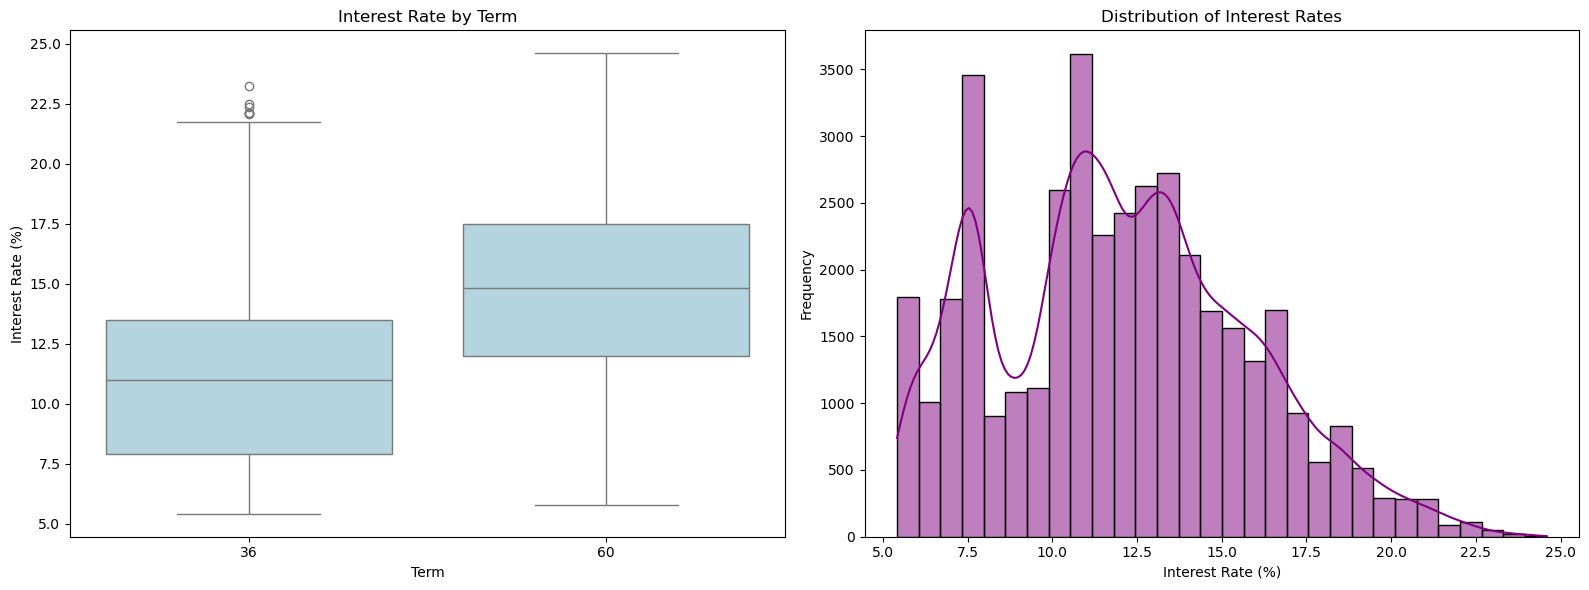

In [141]:
# Distribution of Interest Rates

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for Interest Rate vs. Term
sns.boxplot(x='term', y='int_rate', data=df_loan, ax=axes[0], color='lightblue')
axes[0].set_title('Interest Rate by Term')
axes[0].set_ylabel('Interest Rate (%)')
axes[0].set_xlabel('Term')

# Histogram for Distribution of Interest Rates
sns.histplot(df_loan['int_rate'], kde=True, bins=30, color='purple', ax=axes[1])
axes[1].set_title('Distribution of Interest Rates')
axes[1].set_xlabel('Interest Rate (%)')
axes[1].set_ylabel('Frequency')
plt.tight_layout()

This could suggest that loans with longer terms(60) have more risk leading to higher interest rates. -For term (36 months) there are outliers, it may suggest that some loans are being assigned extremely high interest rates compared to the rest, which might warrant further investigation.

<font color="red" size="5"># Bivariate Analysis</font>

Text(0, 0.5, 'Average Income-to-Loan Ratio')

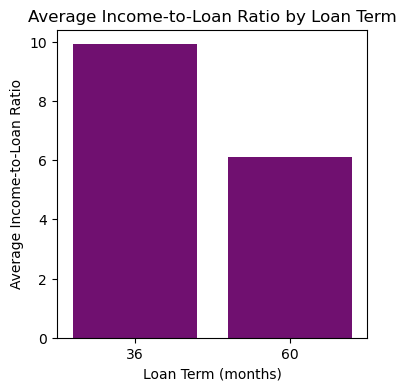

In [148]:
#Relation between income and loan amounts for each term
df_loan['income_loan_ratio'] = df_loan['annual_inc'] / df_loan['loan_amnt'] # Calculating income to loan ratio
avg_income_loan = df_loan.groupby('term')['income_loan_ratio'].mean() # Calculating Average of Income to loan ratio

# Plot the average income-to-loan ratio for each loan term
avg_income_loan = avg_income_loan.reset_index() # Convert the series to a DataFrame
plt.figure(figsize=(4, 4))
sns.barplot(x='term', y='income_loan_ratio', data=avg_income_loan, color='purple')
plt.title('Average Income-to-Loan Ratio by Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Average Income-to-Loan Ratio')

A lower ratio for 60-month loans might indicate over-leveraging. A lower ratio means that the borrower has a higher debt relative to their income. A lower income-to-loan ratio for 60-month loans suggests that borrowers with these loans may be over-leveraged, which could increase the likelihood of default or difficulty in repaying the loan

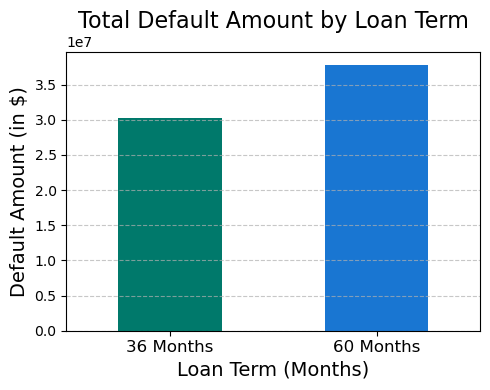

In [85]:
#Total default Loan Amount per Term

#Calculate the total amount lost due to defaults for each term:
default_amount = df_loan[df_loan['loan_status'] == 'Charged Off'].groupby('term')['loan_amnt'].sum() 

default_amount = default_amount.sort_values()

# Plotting the data using subplots 
fig, ax = plt.subplots(figsize=(5, 4))  

# Plot the bar chart 
default_amount.plot(kind='bar', color=['#00796B', '#1976D2'], ax=ax)  

# Adding titles and labels for clarity
ax.set_title('Total Default Amount by Loan Term', fontsize=16)
ax.set_xlabel('Loan Term (Months)', fontsize=14)
ax.set_ylabel('Default Amount (in $)', fontsize=14)
ax.set_xticklabels(['36 Months', '60 Months'], rotation=0, fontsize=12)  # Customizing x-tick labels
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout() 
plt.show()

Lenders might offer higher loan amounts for 60-month loans because the longer repayment period gives borrowers more time to pay back the loan,
making larger loans more affordable on a monthly basis. 
However, offering larger loan amounts could also mean higher risk for the lender, as they have a greater amount of money at stake.



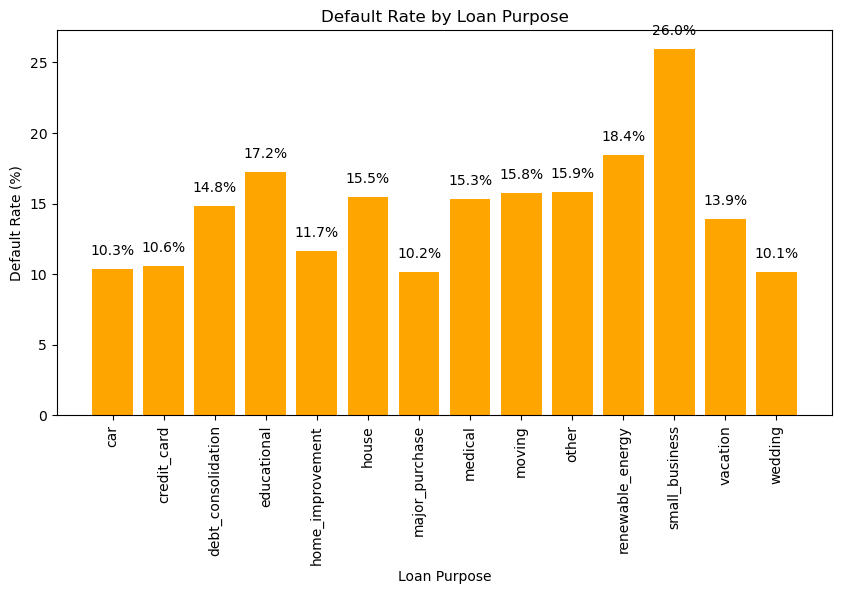

In [59]:
#Default Rate by Loan Purpose
purpose_counts = df_loan.groupby('purpose')['loan_status'].value_counts().unstack(fill_value=0)# Group by purpose and calculate counts

# Calculate default rate
default_rate = (purpose_counts['Charged Off'] / purpose_counts.sum(axis=1)) * 100

# Plot the default rate
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(default_rate.index, default_rate.values, color='orange')

# Annotate bars with percentages
for i, p in enumerate(bars):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 1,
            f'{height:.1f}%',  # Format percentage
            ha='center',  # Horizontal alignment
            fontsize=10)  # Font size

# Add labels and title
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=90)
plt.show()

As per the above analysis Small business default rate is the highest so in that case lenders should implement more robust risk evaluation models, considering factors like the business's cash flow, industry risk, and the owner's financial health.
Industry-specific default models could help lenders better assess the risk of lending to small businesses in different sectors.

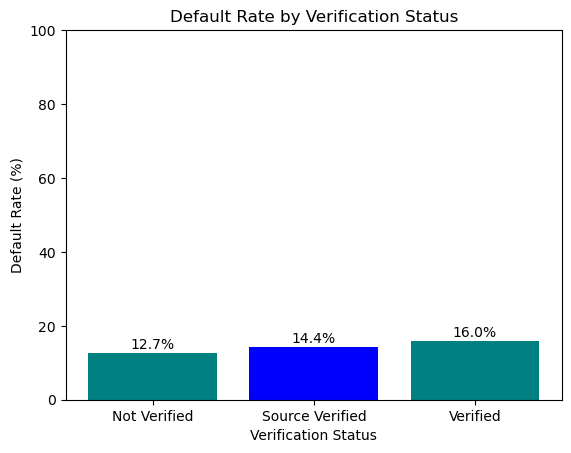

In [90]:
#Default Rate by Verification Status

verification_groups = df_loan.groupby('verification_status') #Group data by verification status

# Calculate total loans and defaults for each group
total_loans = verification_groups.size()

# Count defaults within each group (Charged Off loans)
default_loans = verification_groups['loan_status'].apply(lambda x: (x == 'Charged Off').sum())

# Calculate default rates
default_rates = (default_loans / total_loans) * 100

# Plot the data
fig, ax = plt.subplots()
bars = ax.bar(default_rates.index, default_rates.values, color=['teal', 'blue'])

# Annotate percentages above the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{height:.1f}%',  # Format percentage
            ha='center',  # Horizontal alignment
            fontsize=10)  # Font size

# Add titles and labels
plt.title('Default Rate by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Default Rate (%)')
plt.ylim(0, 100)  # Set y-axis to 0-100 for percentage range
plt.show()

A higher default rate among verified borrowers could indicate that borrowers with verified income or employment status are still facing financial difficulties.
And it’s possible that verified borrowers are more likely to take larger loans, longer-term loans, or loans with higher interest rates, which might increase the likelihood of default.

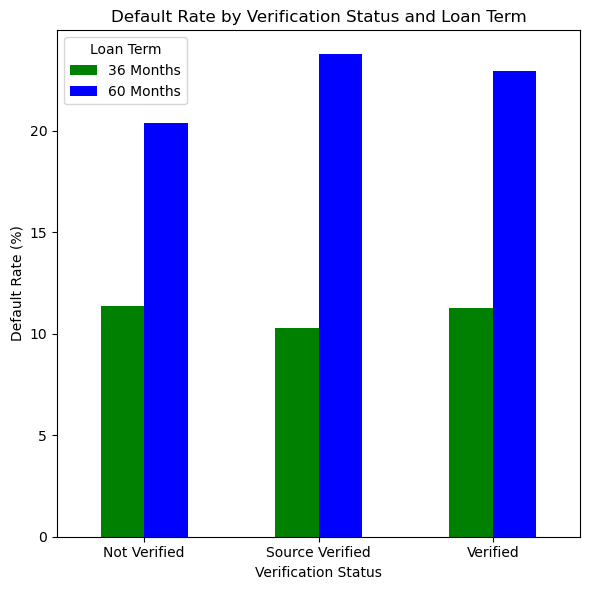

In [119]:
# 4. Calculate Default Rate by Verification Status and Loan Term
# Filter the data where loan status is 'Charged Off' and group by verification status and loan term
default_rate_by_verification_term = df_loan[df_loan['loan_status'] == 'Charged Off'].groupby(['verification_status', 'term']).size() / df_loan.groupby(['verification_status', 'term']).size() * 100

# Convert the default rates into a DataFrame for easier plotting
default_rate_by_verification_term = default_rate_by_verification_term.unstack(fill_value=0)

# Plot Default Rates by Verification Status and Loan Term
default_rate_by_verification_term.plot(kind='bar', figsize=(6, 6), color=['green', 'blue'], stacked=False)
plt.title('Default Rate by Verification Status and Loan Term')
plt.xlabel('Verification Status')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Loan Term', labels=['36 Months', '60 Months'])
plt.tight_layout()
plt.show()

So as we can see verified borrowers have a higher default rate on 60-month loans because they could be taking out these loans for purposes 
such as for small business purpose.

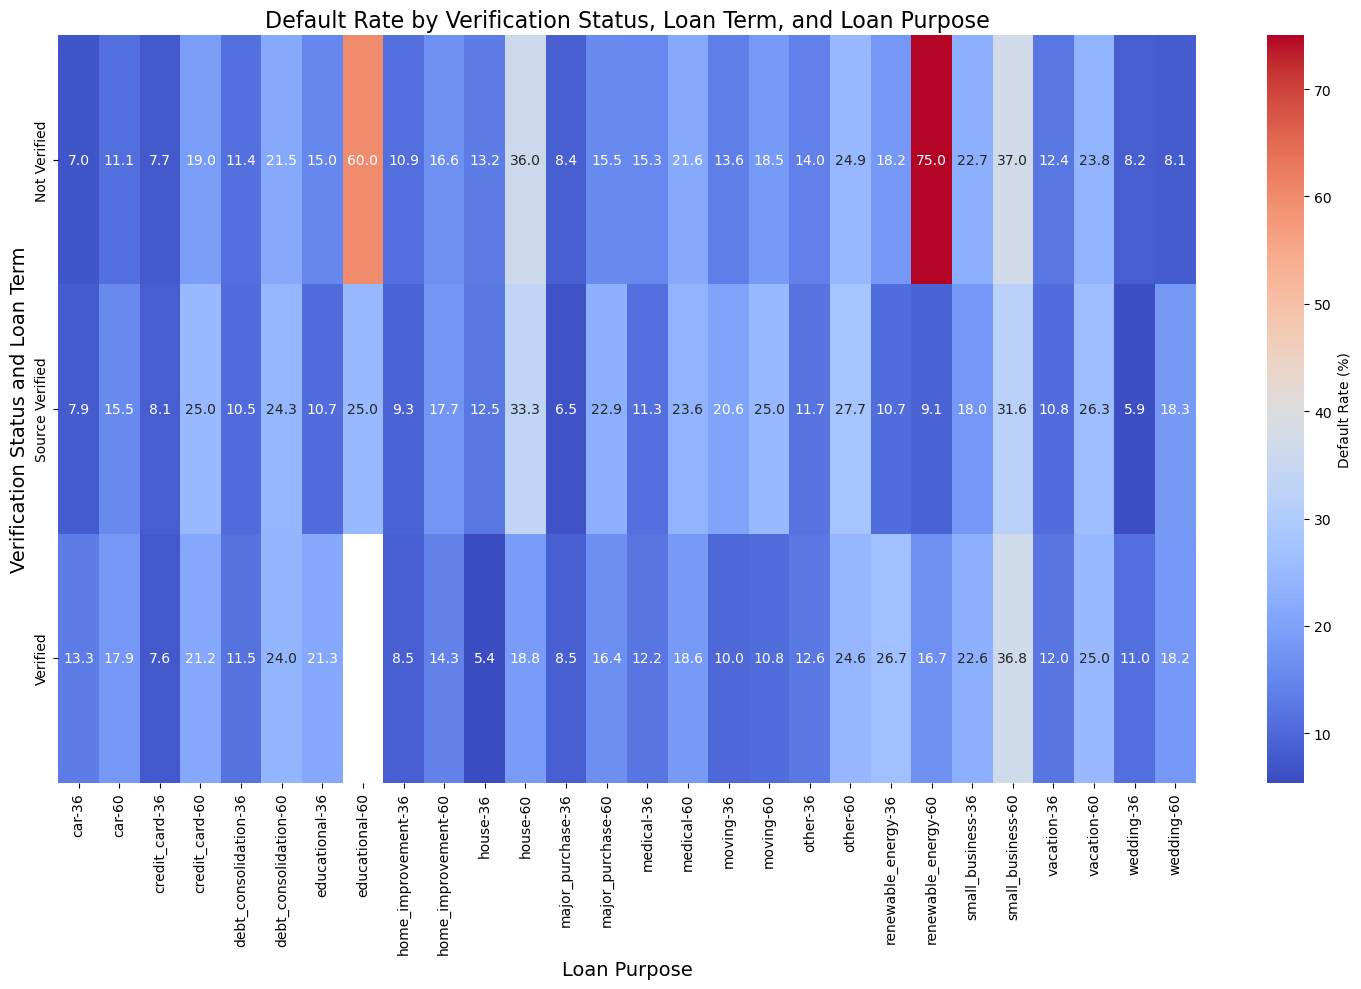

In [138]:
default_rate_by_verification_term_purpose = df_loan[df_loan['loan_status'] == 'Charged Off'].groupby(['verification_status', 'term', 'purpose']).size() / df_loan.groupby(['verification_status', 'term', 'purpose']).size() * 100

# Convert the default rates into a DataFrame for easier plotting
default_rate_by_verification_term_purpose = default_rate_by_verification_term_purpose.unstack(fill_value=0)

#Create a pivot table to reshape the data for a heatmap
heatmap_data = default_rate_by_verification_term_purpose.unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f', cbar_kws={'label': 'Default Rate (%)'})

# Adding titles and labels
plt.title('Default Rate by Verification Status, Loan Term, and Loan Purpose', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Verification Status and Loan Term', fontsize=14)
plt.tight_layout()
plt.show()

We can conclude that the highest default rate is observed among verified borrowers with a 60-month loan term, particularly for those taking loans for small business purposes.

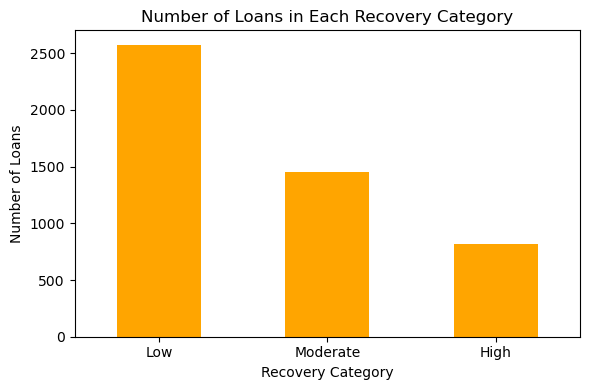

In [158]:
# Insights using Recovery Rate

df_loan['recovery_rate'] = (df_loan['total_pymnt'] / df_loan['funded_amnt']) * 100 # calculating recovery rate

df_loan['recovery_category'] = pd.cut(df_loan['recovery_rate'], bins=[0, 50, 80, 100], labels=['Low', 'Moderate', 'High'])

# Count loans in each category
recovery_category_counts = df_loan['recovery_category'].value_counts()

# Plotting the count of loans in each recovery category
recovery_category_counts.plot(kind='bar', figsize=(6, 4), color='orange')

plt.title('Number of Loans in Each Recovery Category')
plt.xlabel('Recovery Category')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

A significant number in the Low category might indicate that there is someissues with loan recoveries.

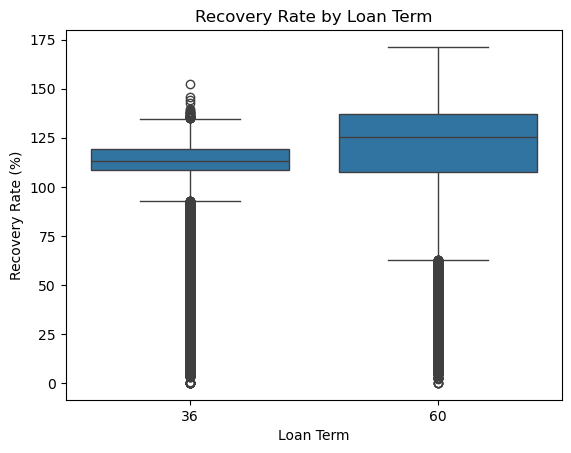

In [161]:
#Analyze recovery rates across different loan terms
sns.boxplot(x='term', y='recovery_rate', data=df_loan)
plt.title('Recovery Rate by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Recovery Rate (%)')
plt.show()

We can get many insights from this the recovery rate for 60 month loan is higher than 36.
Low outliers could indicate poor recovery strategies, economic conditions, or high-risk loans.
High outliers might result from unusually successful recoveries.